## Project : Titanic - ML from Disaster

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')


In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Notes:
- SibSp:# of siblings / spouses
- Parch :# of parents / children aboard the Titanic
- Ticket: Ticket number
- Cabin: Cabin number

In [5]:
# preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### PassengerID
<p>The first columns is the PassengerID. The ID for a panssenger is just a number to identify this panssenger is this dataset> So this columns is not really a part of the information we should care about. We can drop this colums or make it the index for this dataset.Let's make it the index for the dataset just to demonstrate the use of df.set_index method.</p>

In [6]:
train_df.set_index(train_df.PassengerId, inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
train_df.drop(columns='PassengerId', axis=1 , inplace=True)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
test_df = pd.read_csv('./data/test.csv', index_col='PassengerId')
test_df.tail()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


#### Summary
- Categorical : `Survived`, `Sex`, `Embarked`, `Pclass`, `Parch`, `SibSp`
- Numerical:  `Age`(continuous), `Fare`(discrete)
- Mix type of data: `Ticket`, `Cabin`
- Contain Error/typo: `Name`
- Blank or Null: `Cabin`> `Age` > `Embarked`
- Various Data Type: String, Int, Float

<p>According to the data dictionary, we know that if a Survived is marked as 1, he or she surivied. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the columns is int64, which is a numerical type. We can change that with the following command.</p>

In [11]:
key_args ={
    'Sex': "category",
    'Embarked': "category",
    'Pclass': "category",
    'Parch': "category",
    'SibSp': "category"
}
train_df = train_df.astype(key_args)
train_df = train_df.astype({"Survived": 'category'})
test_df = test_df.astype(key_args)

In [12]:
type_data= pd.DataFrame(
    {
        "train": train_df.dtypes,
        "test": test_df.dtypes
        
    }).T
type_data

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
train,float64,object,category,float64,object,category,category,category,category,category,object
test,float64,object,category,float64,object,category,category,category,category,NaN,object


## Distribution of Numerical features across the sample

In [13]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Distribution of Category feature

In [14]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## Exploratory Data Analysis (EDA)
#### Correlating categorical feature
- Category: `Survived`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` 

### Target Variable: `Survived`

In [15]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

`Sex`

In [17]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

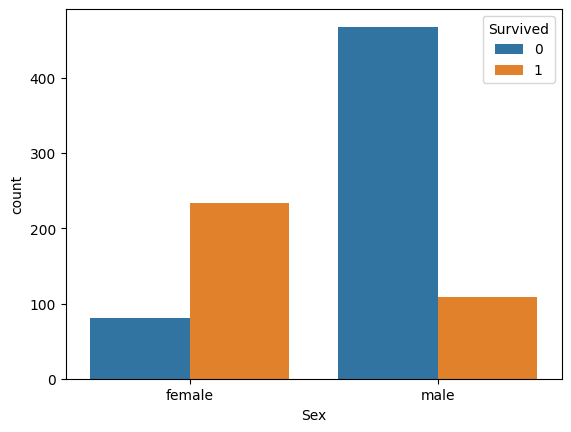

In [18]:
sns.countplot(data=train_df, x='Sex', hue="Survived")

- Remaining Categorical Feature Columns

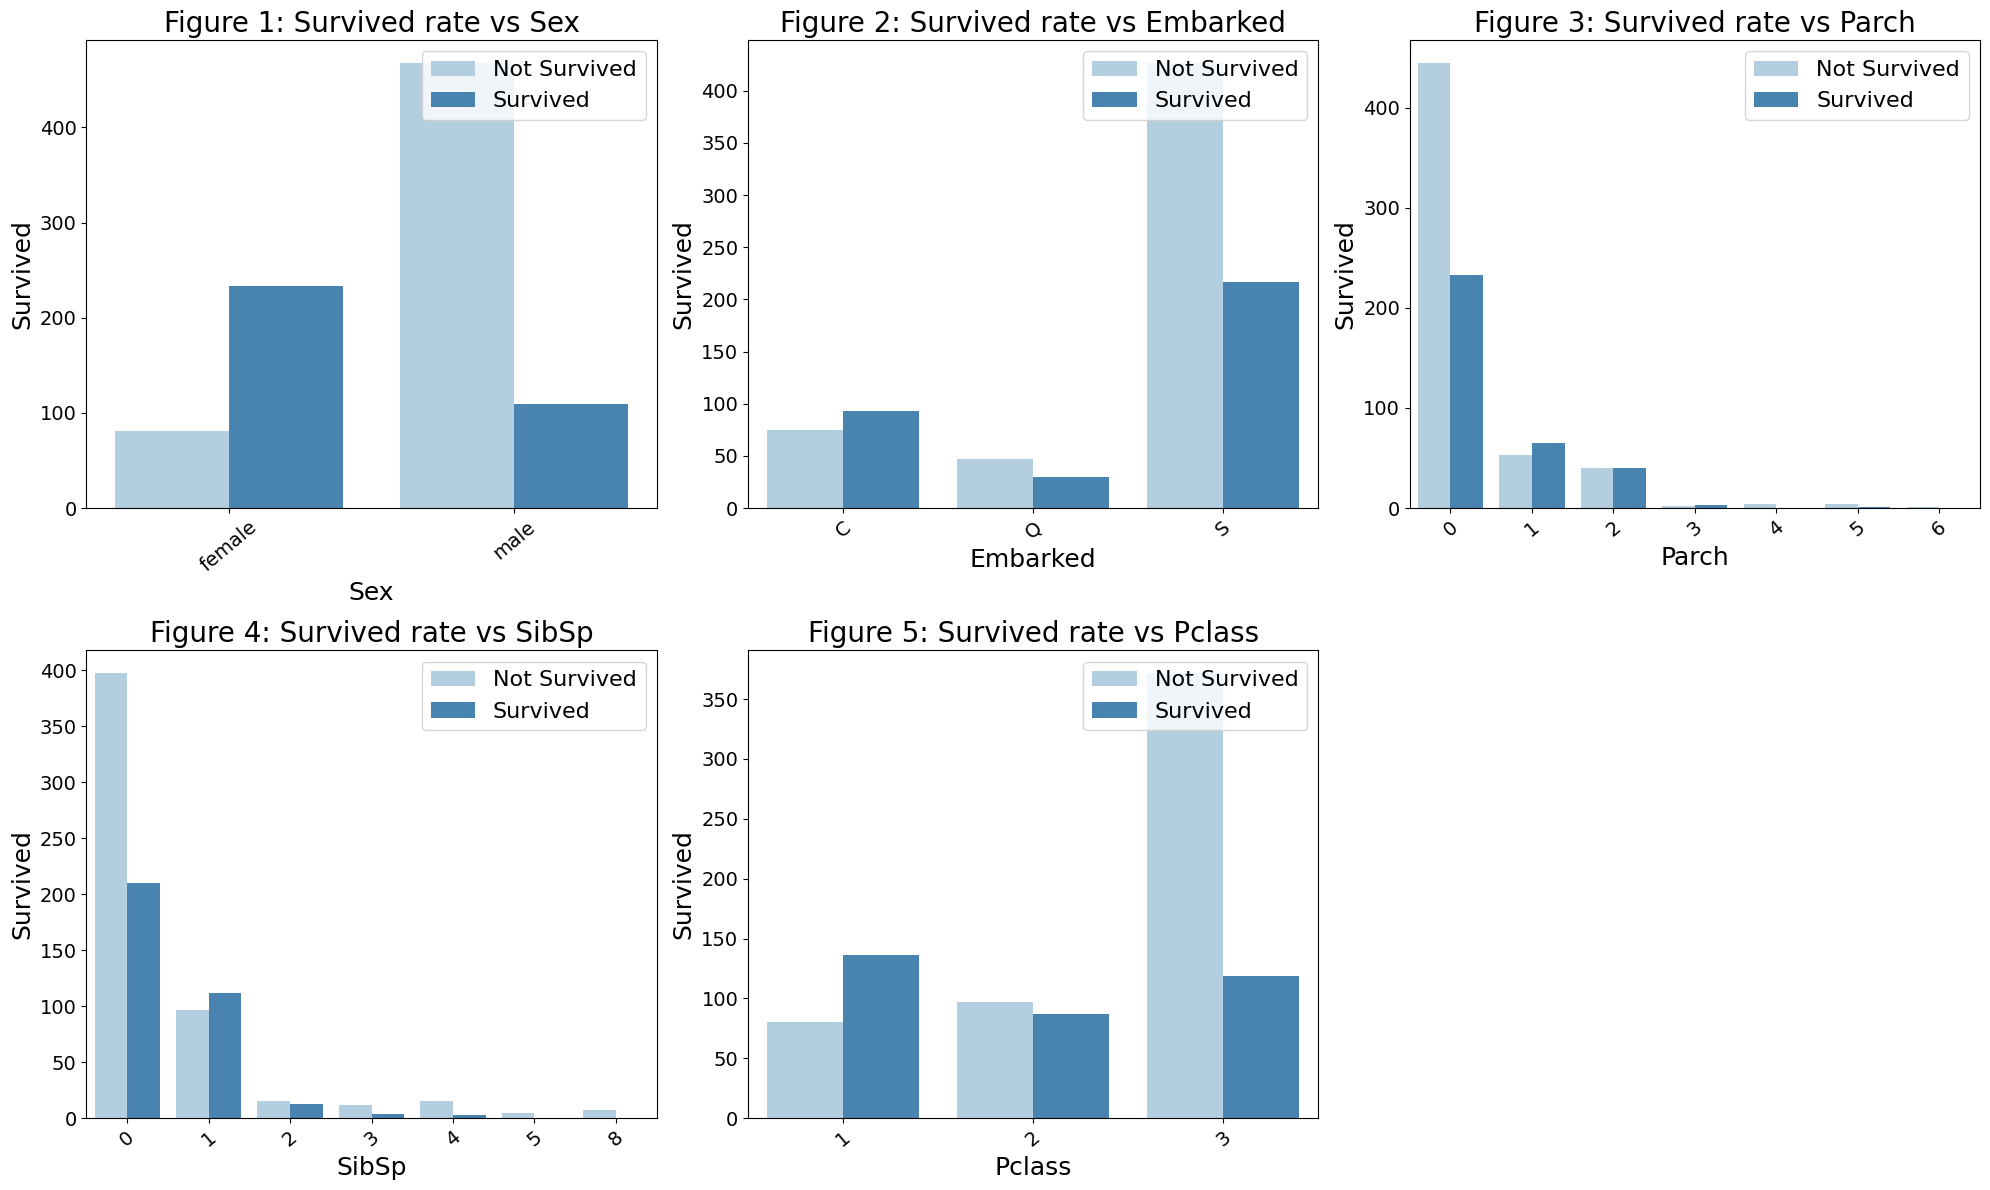

In [19]:
category_cols = ['Sex', 'Embarked', 'Parch', 'SibSp', 'Pclass']
plt.figure(figsize=(20, 12))
for index, feat in enumerate(category_cols):
    plt.subplot(2, 3, index+1)
    sns.countplot(data=train_df, x=train_df[feat], hue="Survived", palette="Blues")
    plt.title(f'Figure {index+1}: Survived rate vs {category_cols[index]}', fontsize="20")
    plt.xlabel(xlabel=category_cols[index], fontsize='18')
    plt.xticks(fontsize='14', rotation=40)
    plt.ylabel(ylabel="Survived", fontsize='18')
    plt.yticks(fontsize='14')
    plt.legend(title="", loc='upper right', labels=['Not Survived', 'Survived'], fontsize='16')
    
    
plt.tight_layout()

### Observation
* **Survival Rate**:
    - Fig 1 : Female survival rate more than Male
    - Fig 2 : Most People embarked on Southampton, and also had the highest people not survived
    - Fig 3 : 1st class higher survival rate
    - Fig 4 : People going with 0 `SibSp` are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival
    - Fig 5 : People going with 0 `Parch` are survived

## EDA for Numerical Features
- Numerical Features: `Age`(continuous), `Fare`(discrete)
### Age

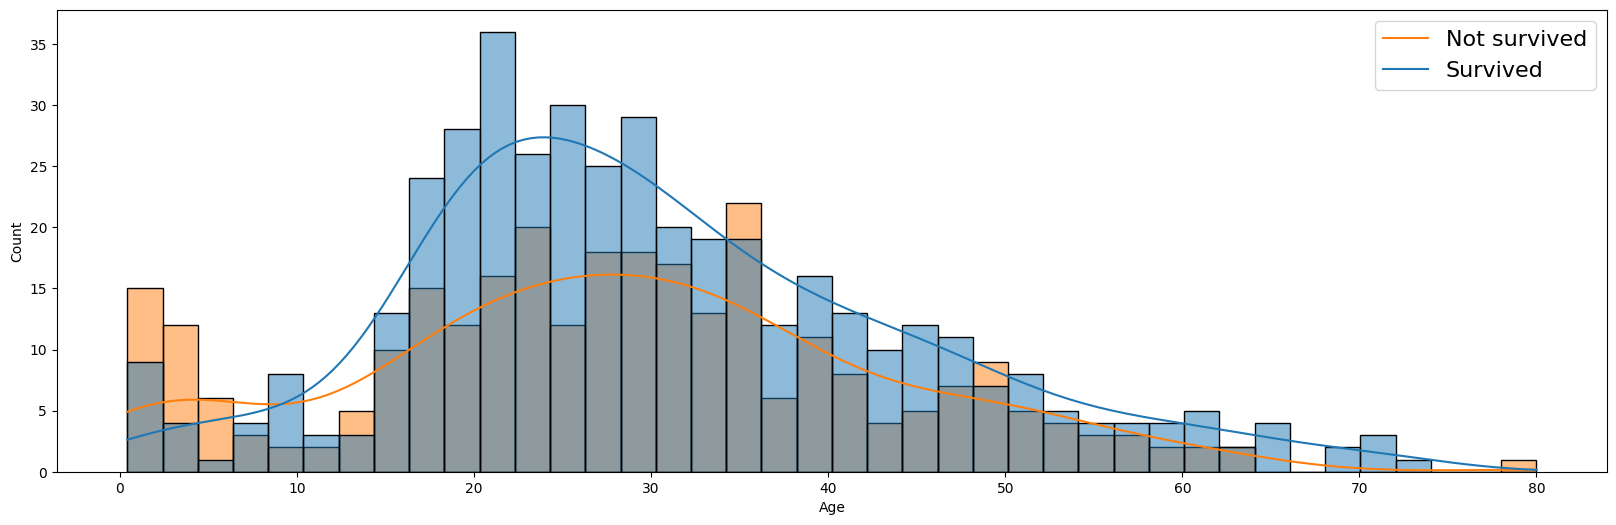

In [20]:
plt.figure(figsize=(20,6))
sns.histplot(data=train_df, x='Age', bins=40, kde=True, hue='Survived')
plt.legend(title="", labels=['Not survived', 'Survived'], fontsize="16")


- Majority passengers were from 18-40 ages
- Children had more chance to survived than other ages

### Fare

In [21]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

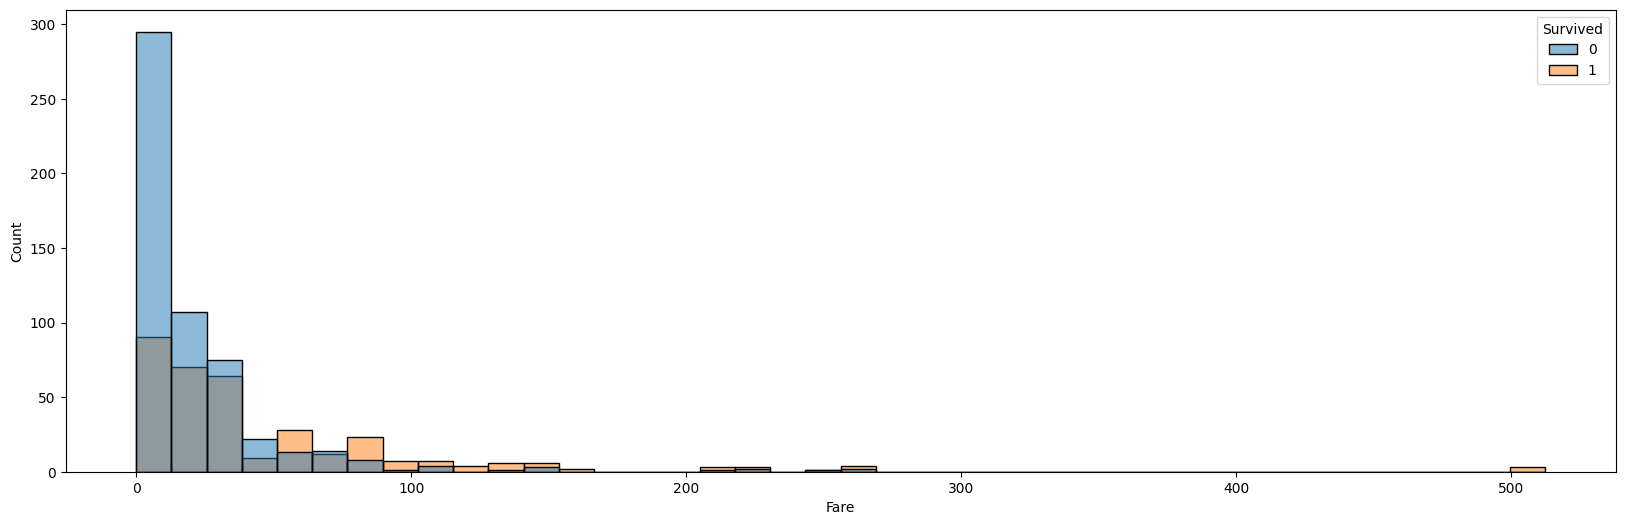

In [22]:
plt.figure(figsize=(20, 6))
sns.histplot(data=train_df, x='Fare', bins=40, hue="Survived")

In [23]:
# To name for 0-25% quartile, 25-50, 50-75, 75-100
fare_category = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data =  pd.qcut(train_df['Fare'], 4, labels=fare_category)
sns.countplot(quartile_data, hue=train_df['Survived'])
plt.legend(title="", labels=['Not survived', 'Survived'], fontsize="12")


ValueError: Cannot use `hue` without `x` and `y`

* **Distribution of Fare**
    - Fare doesn't follow a normal distribution and has a huge at the price range `[0- 100$]`
    - The  distribution is skewed to the left with `75%` of the fare paid under `31$` and a max price of `512$`
* **Quartile**
    - Passenger with `Luxury` and `Expensive` had more chance to survive

## Feature Engineering & Data Wrangling

### Name

In [ ]:
train_df["Name"]  

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
import re
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    if p.search(name) is None:
        print(name)
    return p.search(name).groups(1)[0].strip()
train_df['Title'] = train_df['Name'].apply(extract_title)

In [ ]:
train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [ ]:
test_df["Title"] = test_df['Name'].apply(extract_title)
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

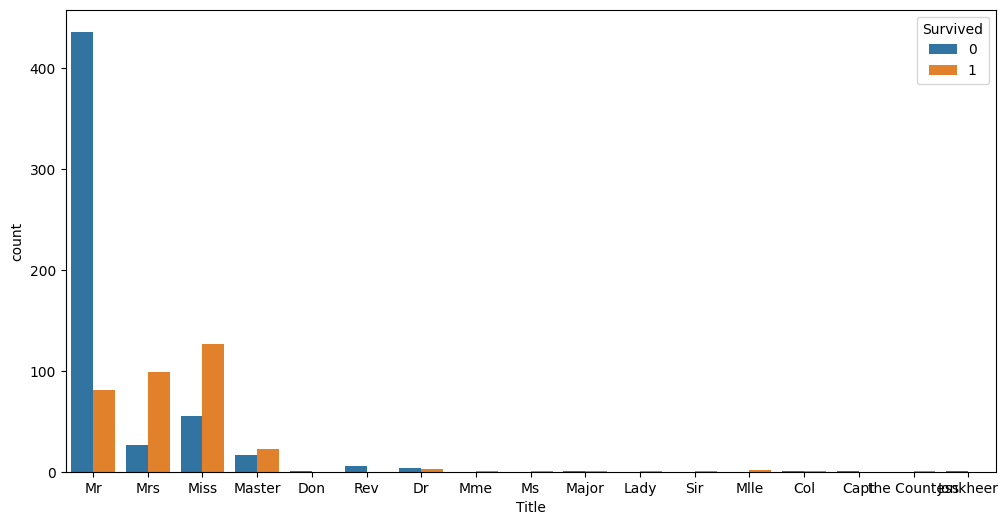

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x="Title", hue='Survived')

In [ ]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', "Master"]:
        return title
    elif title == 'Ms':
        return "Miss"
    else:
        return "Other"

train_df['Title'] = train_df['Title'].apply(group_title)
test_df['Title'] = test_df['Title'].apply(group_title)

<Axes: xlabel='Title', ylabel='count'>

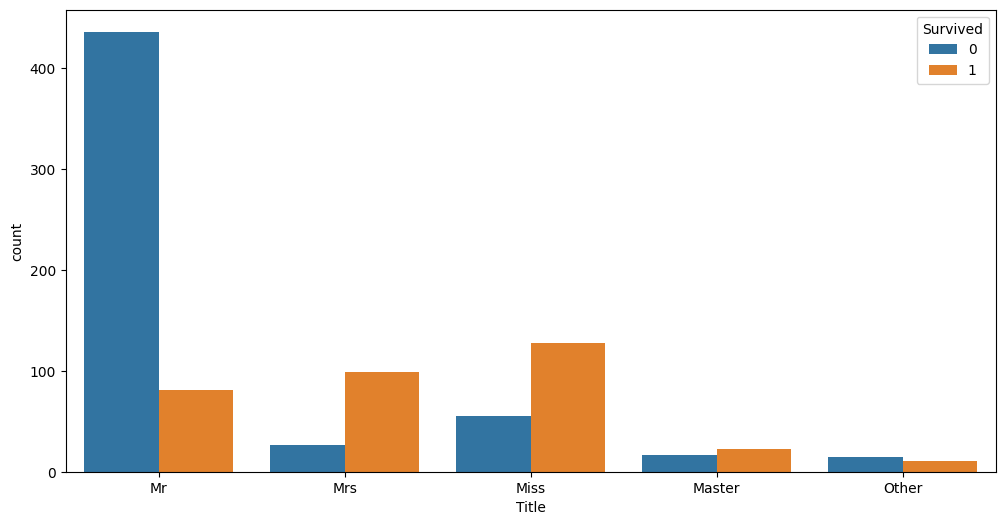

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=train_df, x="Title", hue='Survived')

### Family
- `SibSp`, `Parch`

In [ ]:
# Calculate member of each family
train_df['Family_Member'] = train_df['SibSp'].astype(int) + train_df['Parch'].astype(int) + 1
test_df['Family_Member'] = test_df['SibSp'].astype(int) + train_df['Parch'].astype(int) + 1


<Axes: xlabel='Family_Member', ylabel='count'>

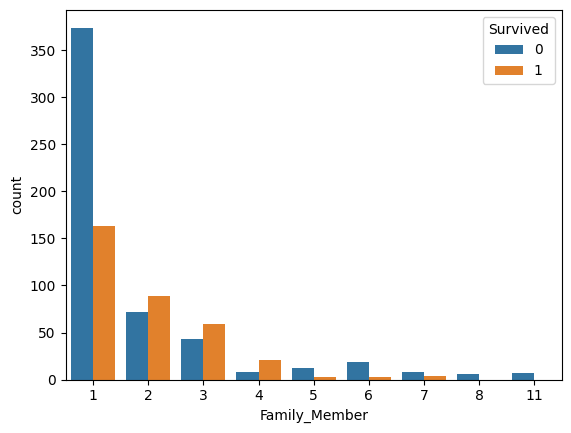

In [ ]:
sns.countplot(data=train_df, x="Family_Member", hue="Survived")

In [ ]:
# Calculate size of each family 
train_df['Family_Size'] = pd.cut(train_df['Family_Member'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Normal', 'Medium', 'Large'])
test_df['Family_Size'] = pd.cut(test_df['Family_Member'], bins=[0, 1, 4, 6, 20], labels=['Solo', 'Normal', 'Medium', 'Large'])

<Axes: xlabel='Family_Size', ylabel='count'>

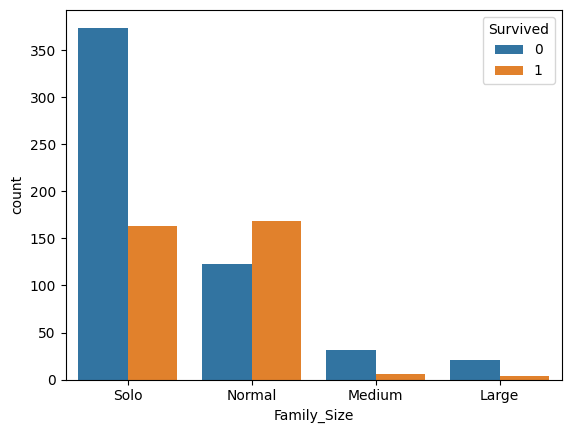

In [ ]:
sns.countplot(data=train_df, x='Family_Size', hue='Survived')

### Data Wrangling

In [ ]:
num_features = ['Age', 'Fare']
category_features = ['Parch', 'Embarked', 'SibSp', 'Pclass', 'Sex']
feature_cols = num_features + category_features
print(feature_cols)

['Age', 'Fare', 'Parch', 'Embarked', 'SibSp', 'Pclass', 'Sex']


In [ ]:
def display_missing(df, feat_cols):
    n_sample = len(df)
    for col in feat_cols:
       missing_count = df[col].isnull().sum()
       
       if missing_count > 0:
           print(f'Columns {col} has {missing_count*100 /n_sample:.2f}% missing_values')
print('Missing in train dataset')
display_missing(train_df, feature_cols)
print()
print('Missing in test dataset')
display_missing(test_df, feature_cols)

Missing in train dataset
Columns Age has 19.87% missing_values
Columns Embarked has 0.22% missing_values

Missing in test dataset
Columns Age has 20.57% missing_values
Columns Fare has 0.24% missing_values


### Filling missing value
- `Age` : Filling missing values with `median` of whole dataset

In [ ]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']
age_by_sex_pclass

C:\Users\DELL\AppData\Local\Temp\ipykernel_13796\1121100101.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
# Filling the missing values in Age with the medians of Sex and Pclass in groups
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Columns Embarked has 0.22% missing_values
Columns Fare has 0.24% missing_values


C:\Users\DELL\AppData\Local\Temp\ipykernel_13796\4138962590.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))
C:\Users\DELL\AppData\Local\Temp\ipykernel_13796\4138962590.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .grou

In [ ]:
X = train_df[feature_cols]
y = train_df['Survived']

In [ ]:
X_test = test_df[feature_cols]

#### Preprocess Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

category_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', category_transformer, category_features)
])
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Parch', 'Embarked', 'SibSp', 'Pclass',
                                  'Sex'])])

In [ ]:
X= preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_val.shape

((712, 24), (179, 24))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
# Score of logistic model
log_reg.score(X_val, y_val)

0.8379888268156425

In [ ]:
y_pred = log_reg.predict(X_val)

In [ ]:
def check_score(model, X_val, y_true):
    y_pred = model.predict(X_val)
    print(f'Classification report:\n {classification_report(y_true, y_pred)}')
check_score(log_reg, X_val, y_val)

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       112
           1       0.80      0.76      0.78        67

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly =PolynomialFeatures(degree=2)
poly_feature_train = poly.fit_transform(X_train)
poly_feature_val =poly.transform(X_val)

In [ ]:
#Build Polynomial Logistic Regression model
poly_log_reg = LogisticRegression()
poly_log_reg.fit(poly_feature_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
check_score(poly_log_reg, poly_feature_val, y_val)

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88       112
           1       0.88      0.67      0.76        67

    accuracy                           0.84       179
   macro avg       0.86      0.81      0.82       179
weighted avg       0.85      0.84      0.84       179



#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth= 5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
decision_tree.score(X_val, y_val)

0.8268156424581006

#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
decision_tree_cv = DecisionTreeClassifier()

In [ ]:
lr_score = cross_val_score(estimator=log_reg_cv, X=X, y=y, scoring='accuracy', cv=5)
print(lr_score.mean(), lr_score.std())

0.8137028435126485 0.01591518106220181


In [ ]:
dt_score = cross_val_score(estimator=decision_tree, X=X, y=y, scoring='accuracy', cv=5)
print(dt_score)

[0.82681564 0.80898876 0.80898876 0.78089888 0.85393258]


### Baseline Model Comparison

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
seed = 2023
models = [
    SVC(random_state=seed),
    LinearSVC(random_state=seed),
    KNeighborsClassifier(n_neighbors=2, metric='minkowki'),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    LogisticRegression(random_state=seed, solver='liblinear', max_iter=1000),
    
    XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss')
    
]

In [ ]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models, X, y, metrics, cv=5, plot_res =False):
    k_fold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    
    for model in models: 
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X,y, cv=k_fold, scoring=metrics)
        
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    cv_df = pd.DataFrame(entries, columns=['Model name', 'fold_id', 'accuracy score'])
    
    if plot_res:
        plt.figure(figsize=(20,6))
        sns.boxplot(x='Model name', y='accuracy score', data=cv_df, color='lightblue', showmeans=True)
        plt.title('Box plot of Baseline Model accuracy using 5-fold cross-validation')
        
        plt.xticks(rotation=45, fontsize='12')
        plt.yticks(fontsize='12')
        
        plt.xlabel('Model name', fontsize='16')
        plt.ylabel('Accuracy score', fontsize='16')
        
        
    # Summary result
    mean = cv_df.groupby('Model name')['accuracy score'].mean()
    std = cv_df.groupby('Model name')['accuracy score'].std()
    
    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ['Mean', 'Standard Deviation']
    
    # Sort by Accuracy 
    baseline_result.sort_values(by=['Mean'], ascending=False, inplace=True)
    
    
    return baseline_result
generate_baseline_results(models, X, y ,metrics='accuracy', plot_res=True)
        

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 0, 0, 1, 1, 1, 0, 1]

precision = f1_score(y_true, y_pred)
print("Precision:", precision)


Precision: 0.6666666666666665
